## Lead Scoring Case Study

In [164]:
import warnings
warnings.filterwarnings('ignore')

In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [166]:
leadscore = pd.read_csv("Leads.csv")
leadscore.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [167]:
leadscore.shape

(9240, 37)

In [168]:
leadscore.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [169]:
leadscore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### Data cleaning


In [170]:
# Check the missing values in the data set

In [171]:
leadscore.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [172]:
# Replacing 'Select' with NaN (Select means no option is chosen)
leadscore = leadscore.replace('Select',np.nan)

In [173]:
# Now I would like to check the columns that have more than 40% of missing values

In [174]:
mis_per = leadscore.isnull().sum()*100/len(leadscore)

In [175]:
mis_per[mis_per>40]

How did you hear about X Education    78.463203
Lead Quality                          51.590909
Lead Profile                          74.188312
Asymmetrique Activity Index           45.649351
Asymmetrique Profile Index            45.649351
Asymmetrique Activity Score           45.649351
Asymmetrique Profile Score            45.649351
dtype: float64

In [176]:
# Drop these columns for better analysis

In [177]:
leadscore.drop(columns=mis_per[mis_per>40].index, inplace = True)

In [178]:
leadscore.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,Interested in other courses,No,No,NaN,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,Ringing,No,No,NaN,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


Let's check the columns that have less than 40% of missing values and more than 0% of missing values

In [179]:
mis_per[(mis_per<=40) & (mis_per>0)]

Lead Source                                       0.389610
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Tags                                             36.287879
City                                             39.707792
dtype: float64

In [180]:
leadscore.Tags.value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

Since there are so many tags and the amount of missing is large, let's create a category called "Other" for these missing values.

In [181]:
leadscore["Tags"] =leadscore["Tags"].fillna("Other")

In [182]:
leadscore['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [183]:
leadscore['What matters most to you in choosing a course'].fillna('Better Career Prospects',inplace = True)

In [184]:
leadscore['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [185]:
leadscore['What is your current occupation'].fillna('Unemployed',inplace = True)

In [186]:
leadscore['What is your current occupation'].value_counts()

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [187]:
leadscore['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [188]:
leadscore['Country'].fillna('India',inplace = True)

In [189]:
leadscore['Specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [190]:
leadscore['Specialization'].fillna('Select',inplace = True)

In [191]:
leadscore['City'].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [192]:
leadscore['City'].fillna('Mumbai',inplace = True)

- The missing values of columns "Lead Source,TotalVisits, Page Views Per Visit,Last Activity" are less than 5%, and "as in statistical language, if the number of the cases is less than 5% of the sample, then the researcher can drop them". 
- Quote from "https://www.statisticssolutions.com/dissertation-resources/missing-values-in-data/" website" 
- As a result, I decide to detele the missing values of those columns.

In [193]:
leadscore= leadscore[~leadscore['Lead Source'].isnull()]
leadscore= leadscore[~leadscore['TotalVisits'].isnull()]
leadscore= leadscore[~leadscore['Page Views Per Visit'].isnull()]
leadscore= leadscore[~leadscore['Last Activity'].isnull()]

In [194]:
missing_percentage = leadscore.isnull().sum()*100/len(leadscore)
missing_percentage[(missing_percentage>0)]

Series([], dtype: float64)

We have cleared all the missing values of the leadscore dataset

In [195]:
leadscore.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000
mean,617032.619352,0.378554,3.456028,482.887481,2.370151
std,23348.029512,0.485053,4.858802,545.256560,2.160871
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596406.000000,0.000000,1.000000,11.000000,1.000000
50%,615278.500000,0.000000,3.000000,246.000000,2.000000
75%,637176.500000,1.000000,5.000000,922.750000,3.200000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000


In [196]:
# We could identify outliers by looking at the gap between 75% percentile and the maximum value. If the gap is big, it shows that there are outliers in that columns.

In [197]:
cont_list = ['Lead Number','Converted','TotalVisits','Total Time Spent on Website','Page Views Per Visit']

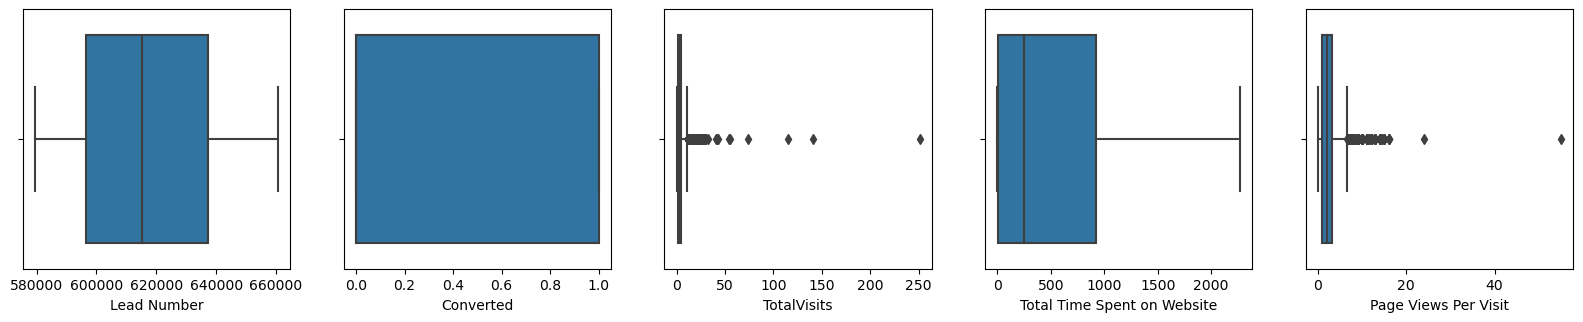

In [198]:
plt.figure(figsize=(20,60))
k=0
for i in cont_list:
    k = k+1
    ax = plt.subplot(15,5,k)
    sns.boxplot(x = i, data=leadscore)

Let's replace the outliers with a NULL value

In [199]:
for x in ['TotalVisits']:
    q75,q25 = np.percentile(leadscore.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    leadscore.loc[leadscore[x] < min,x] = np.nan
    leadscore.loc[leadscore[x] > max,x] = np.nan

In [200]:
for x in ['Page Views Per Visit']:
    q75,q25 = np.percentile(leadscore.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    leadscore.loc[leadscore[x] < min,x] = np.nan
    leadscore.loc[leadscore[x] > max,x] = np.nan

In [201]:
leadscore.isnull().sum()

Prospect ID                                        0
Lead Number                                        0
Lead Origin                                        0
Lead Source                                        0
Do Not Email                                       0
Do Not Call                                        0
Converted                                          0
TotalVisits                                      267
Total Time Spent on Website                        0
Page Views Per Visit                             346
Last Activity                                      0
Country                                            0
Specialization                                     0
What is your current occupation                    0
What matters most to you in choosing a course      0
Search                                             0
Magazine                                           0
Newspaper Article                                  0
X Education Forums                            

As we can see, the outliers has been replaced to missing values and it is less than 3% so I decide to drop all the outliers.

In [202]:
leadscore= leadscore[~leadscore['TotalVisits'].isnull()]
leadscore= leadscore[~leadscore['Page Views Per Visit'].isnull()]

In [203]:
leadscore.isnull().sum()

Prospect ID                                      0
Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                      

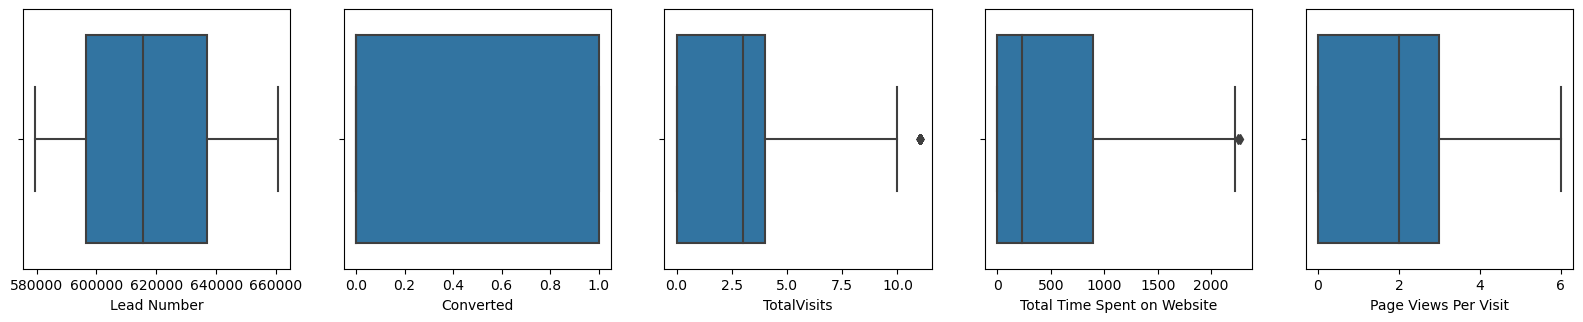

In [204]:
plt.figure(figsize=(20,60))
k=0
for i in cont_list:
    k = k+1
    ax = plt.subplot(15,5,k)
    sns.boxplot(x = i, data=leadscore)

Now I have successfully deal with missing values and outliers.

### EDA

In [205]:
leadscore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8513 entries, 0 to 9239
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    8513 non-null   object 
 1   Lead Number                                    8513 non-null   int64  
 2   Lead Origin                                    8513 non-null   object 
 3   Lead Source                                    8513 non-null   object 
 4   Do Not Email                                   8513 non-null   object 
 5   Do Not Call                                    8513 non-null   object 
 6   Converted                                      8513 non-null   int64  
 7   TotalVisits                                    8513 non-null   float64
 8   Total Time Spent on Website                    8513 non-null   int64  
 9   Page Views Per Visit                           8513 

In [206]:
leadscore.Converted.value_counts()

0    5307
1    3206
Name: Converted, dtype: int64

In [207]:
pos_converted = leadscore[leadscore.Converted == 1]
neg_converted = leadscore[leadscore.Converted == 0]

In [208]:
def Pie_char (col):
    fig, axes = plt.subplots(nrows = 1, ncols=2, figsize = (15,30))
    data = pos_converted[col].value_counts()
    data_df = pd.DataFrame({"labels" : data.index, 'values': data.values})
    data1 = neg_converted[col].value_counts()
    data_df1 = pd.DataFrame({"labels" : data1.index, 'values': data1.values})
# pie chart of subplot 0 (payment_ontime)
    axes[0].pie(data_df['values'], labels = data_df['labels'], autopct = "%0.f%%")
    axes[0].set_title('Converted by '+ col)
    axes[0].legend()

# pie chart of subplot 1 (payment_difficulties)
    axes[1].pie(data_df1['values'], labels = data_df1['labels'], autopct = "%0.f%%")
    axes[1].set_title('Not Converted by ' + col)
    axes[1].legend()

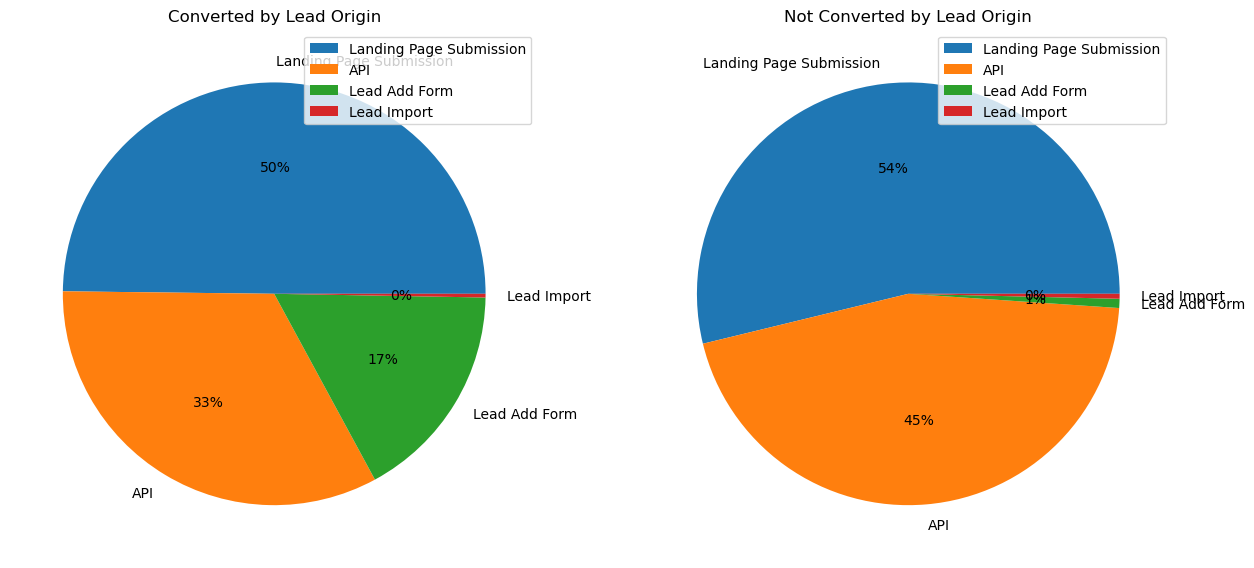

In [209]:
Pie_char('Lead Origin')

The better a lead has been converted, the higher the proportion of Lead Add Form.

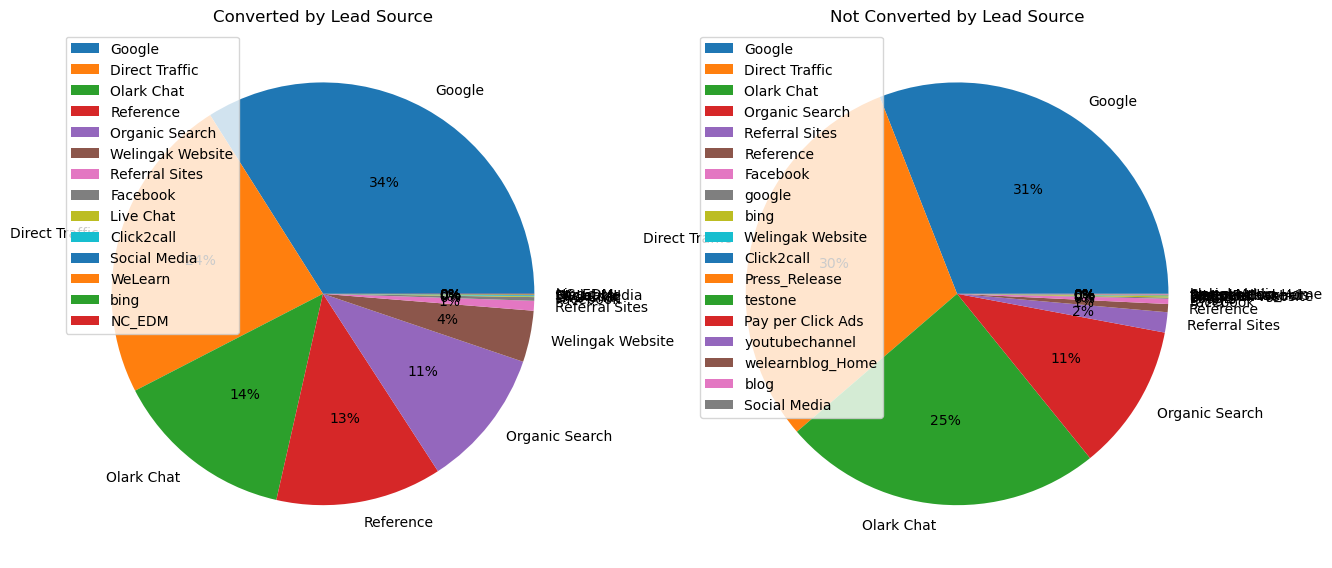

In [210]:
Pie_char('Lead Source')

The better a lead has been converted, the higher the proportion of Reference and Organic Search

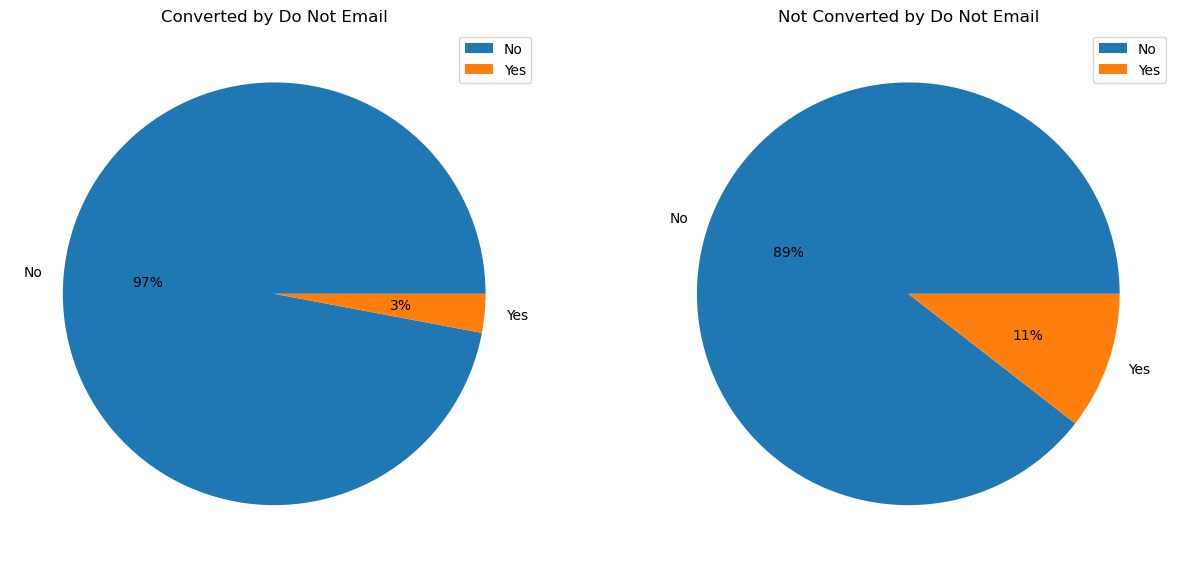

In [211]:
Pie_char('Do Not Email')

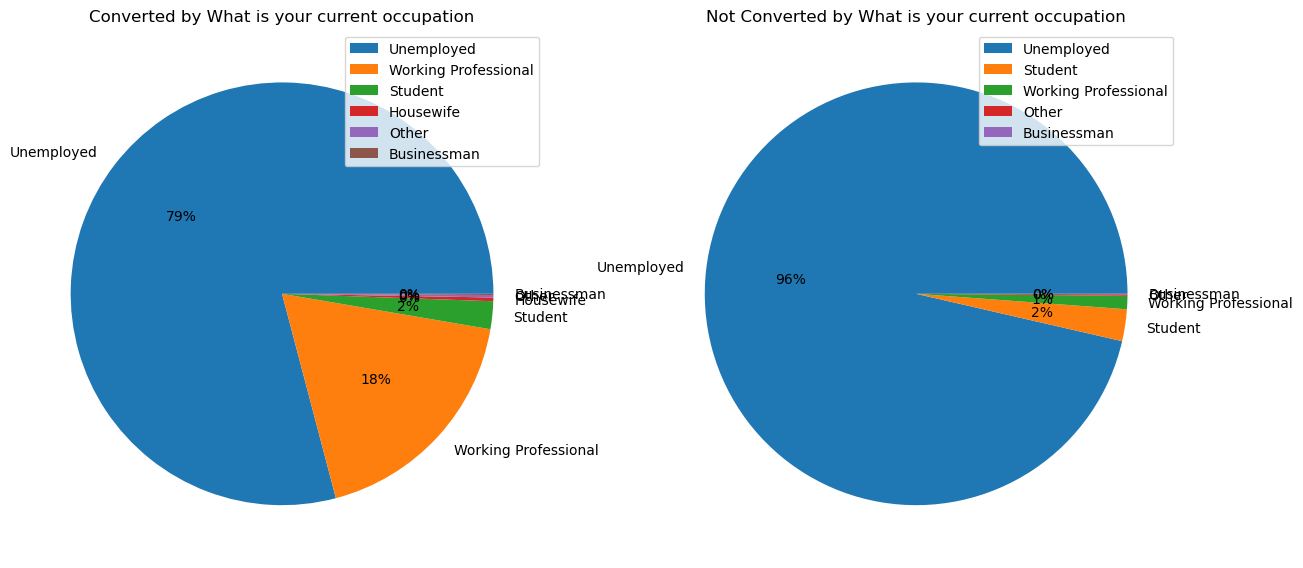

In [212]:
Pie_char('What is your current occupation')

The percentage of working Professional is higher when a lead has been converted.

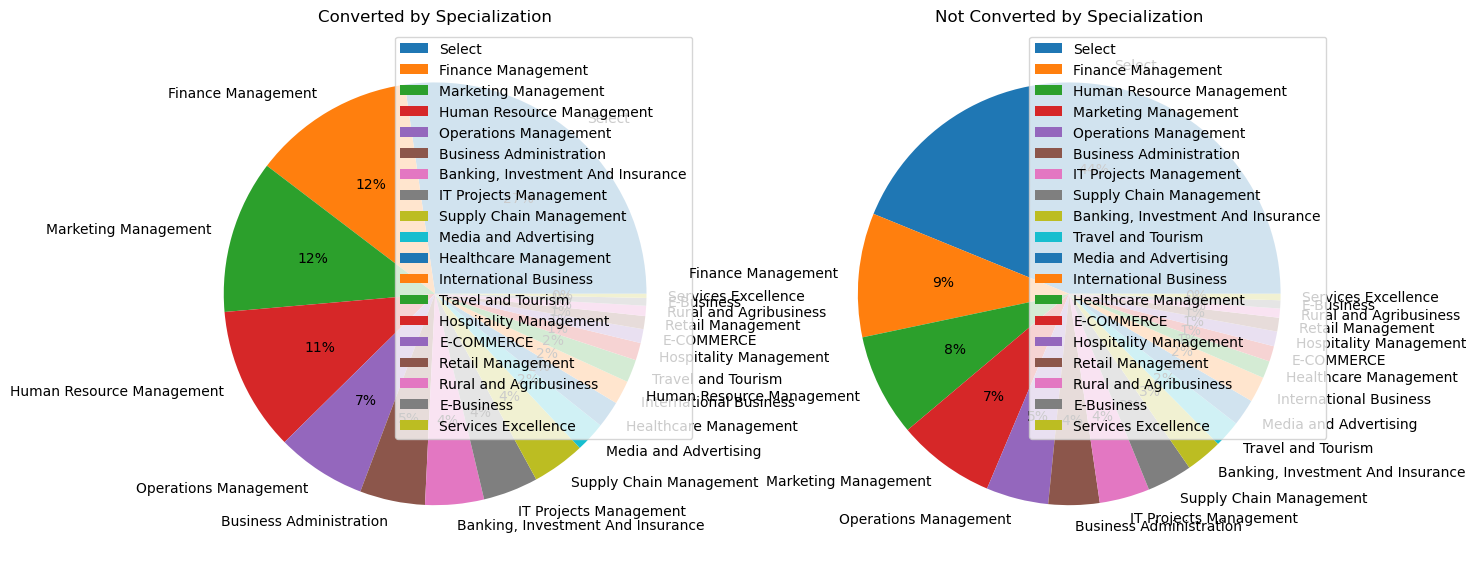

In [213]:
Pie_char('Specialization')

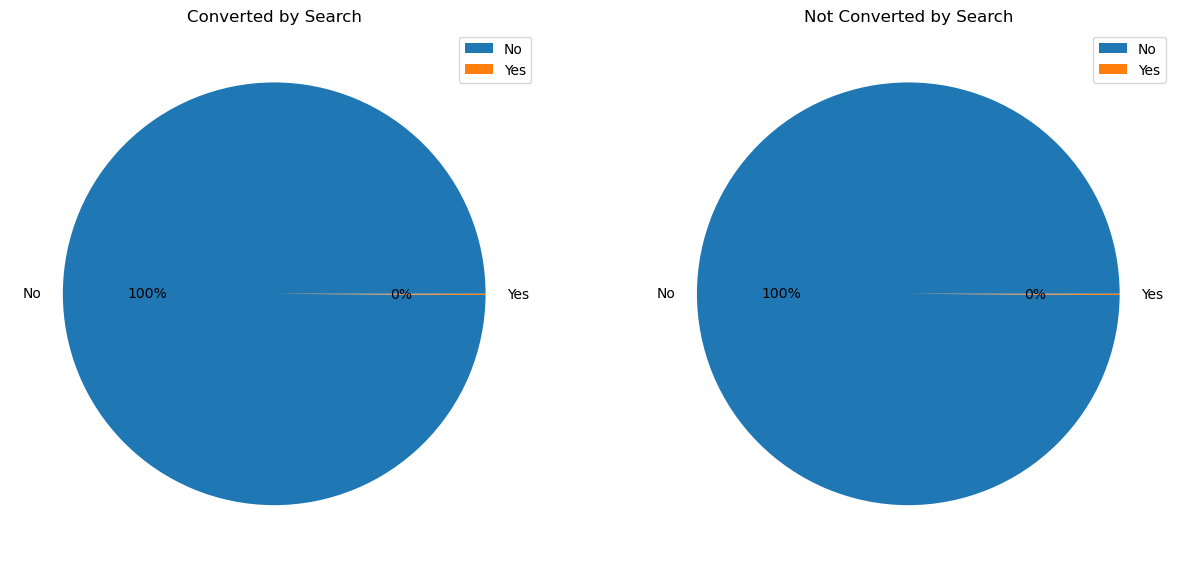

In [214]:
Pie_char('Search')

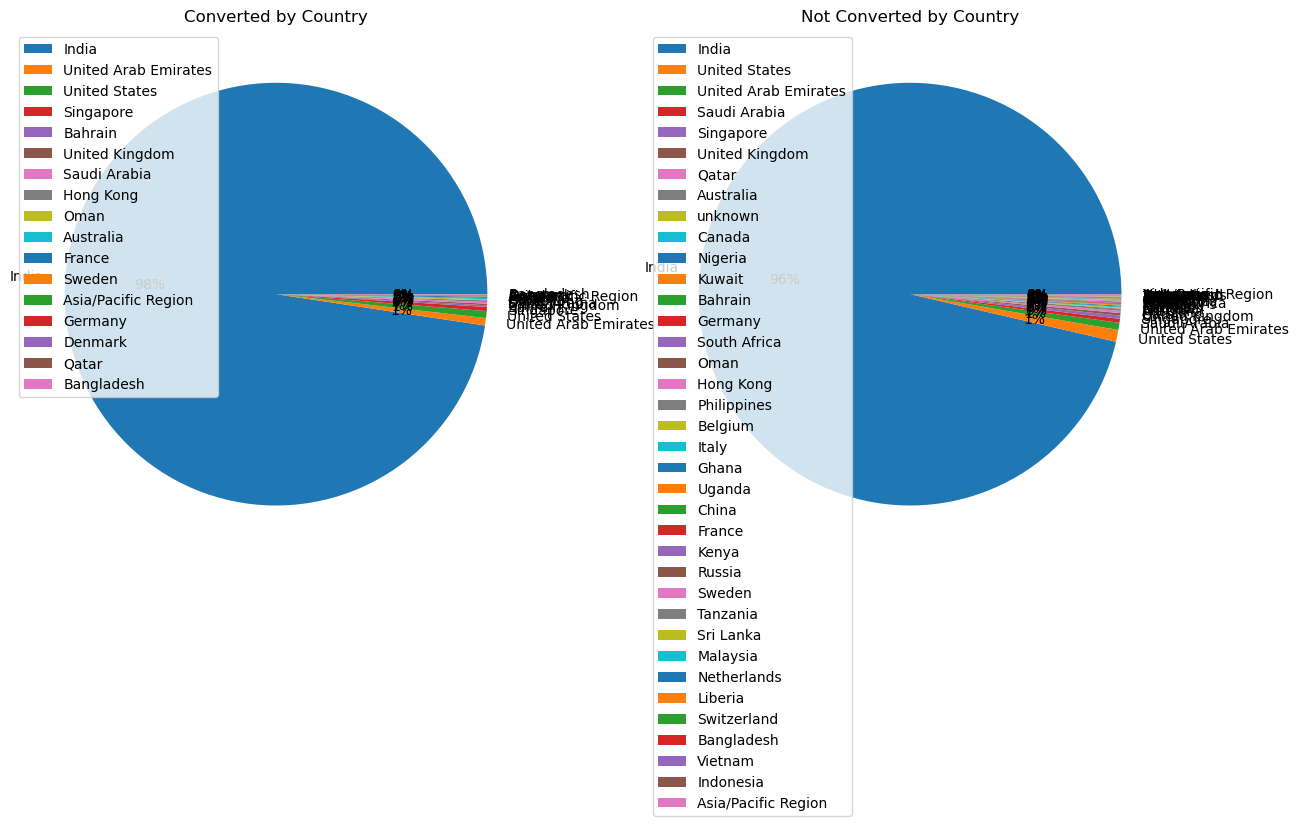

In [215]:
Pie_char('Country')

Most of the customers are from India. The other country will not really have affect on the model. I will drop this column.

In [53]:
leadscore.Magazine.value_counts()

No    8513
Name: Magazine, dtype: int64

In [54]:
leadscore['Newspaper Article'].value_counts()

No    8513
Name: Newspaper Article, dtype: int64

In [55]:
leadscore['X Education Forums'].value_counts()

No    8513
Name: X Education Forums, dtype: int64

In [56]:
leadscore['Newspaper'].value_counts()

No     8512
Yes       1
Name: Newspaper, dtype: int64

In [57]:
leadscore['Digital Advertisement'].value_counts()

No     8511
Yes       2
Name: Digital Advertisement, dtype: int64

In [58]:
leadscore['Through Recommendations'].value_counts()

No     8509
Yes       4
Name: Through Recommendations, dtype: int64

In [59]:
leadscore['Receive More Updates About Our Courses'].value_counts()

No    8513
Name: Receive More Updates About Our Courses, dtype: int64

In [60]:
leadscore['Update me on Supply Chain Content'].value_counts()

No    8513
Name: Update me on Supply Chain Content, dtype: int64

In [61]:
leadscore['Get updates on DM Content'].value_counts()

No    8513
Name: Get updates on DM Content, dtype: int64

In [62]:
leadscore['I agree to pay the amount through cheque'].value_counts()

No    8513
Name: I agree to pay the amount through cheque, dtype: int64

In [63]:
leadscore['Do Not Call'].value_counts()

No     8511
Yes       2
Name: Do Not Call, dtype: int64

In [64]:
leadscore['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      8511
Flexibility & Convenience       1
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

As shown above, most of the values in the above columns are 'No'. The column 'What matters most to you in choosing a course' has most value in Better Career Prospects. I could not infer anything with these columns. So I will drop them.

In [65]:
leadscore.drop(['Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque','Do Not Call','Country', 'What matters most to you in choosing a course'], axis=1, inplace=True)


### Data preparation

In [66]:
leadscore.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,Interested in other courses,Mumbai,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,Ringing,Mumbai,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Mumbai,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,Will revert after reading the email,Mumbai,No,Modified


#### Converting some binary variables (yes/no) to 0/1

In [67]:
# List of variables to map
varlist = ['Do Not Email','A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, 'No':0})
# Applying the fuction to the list
leadscore[varlist] = leadscore[varlist].apply(binary_map)

In [68]:
leadscore.head(10)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,Interested in other courses,Mumbai,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Select,Unemployed,Ringing,Mumbai,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Mumbai,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,Will revert after reading the email,Mumbai,0,Modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,0,0,0.0,0,0.0,Olark Chat Conversation,Select,Unemployed,Other,Mumbai,0,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,0,1,2.0,1640,2.0,Email Opened,Supply Chain Management,Unemployed,Will revert after reading the email,Mumbai,0,Modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,0,0,0.0,0,0.0,Olark Chat Conversation,Select,Unemployed,Other,Mumbai,0,Modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,Landing Page Submission,Direct Traffic,0,0,2.0,71,2.0,Email Opened,IT Projects Management,Unemployed,Other,Thane & Outskirts,1,Email Opened
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,API,Google,0,0,4.0,58,4.0,Email Opened,Finance Management,Unemployed,Other,Mumbai,0,Email Opened


#### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [69]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(leadscore[['Lead Origin','Lead Source','Last Activity','Specialization','What is your current occupation','Tags','City','Last Notable Activity']],drop_first=True)

# Adding the results to the dataframe
leadscore = pd.concat([leadscore,dummy1], axis =1)

In [70]:
leadscore.head(10)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,5.0,674,2.5,Email Opened,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,...,0,0,1,0,0,0,0,0,0,0
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,0,0,0.0,0,0.0,Olark Chat Conversation,...,0,0,1,0,0,0,0,0,0,0
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,0,1,2.0,1640,2.0,Email Opened,...,0,0,1,0,0,0,0,0,0,0
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,0,0,0.0,0,0.0,Olark Chat Conversation,...,0,0,1,0,0,0,0,0,0,0
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,Landing Page Submission,Direct Traffic,0,0,2.0,71,2.0,Email Opened,...,0,0,0,0,0,0,0,0,0,0
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,API,Google,0,0,4.0,58,4.0,Email Opened,...,0,0,0,0,0,0,0,0,0,0


#### Dropping the repeated variables

In [71]:
# We have created dummies for the below variables, so we can drop them
leadscore = leadscore.drop(['Lead Origin','Lead Source','Last Activity','Specialization','What is your current occupation','Tags','City','Last Notable Activity'], 1)

In [72]:
leadscore.head()

,Prospect ID,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0.0,0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,5.0,674,2.5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,1,2.0,1532,2.0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,1.0,305,1.0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,0,1,2.0,1428,1.0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


#### Test-Train Split

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
# Putting feature variable to X
X = leadscore.drop(['Prospect ID','Lead Number','Converted'], axis=1)

X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,0,2.0,1428,1.0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [75]:
# Putting response variable to y
y = leadscore['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [76]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

#### Feature Scaling

In [77]:
from sklearn.preprocessing import StandardScaler

In [78]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
5123,0,-1.153092,-0.867873,-1.253080,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6322,0,-0.743258,0.108309,-0.648118,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3644,0,1.305912,-0.842280,0.561805,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3011,0,0.896078,-0.451076,0.259325,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8140,0,-0.743258,-0.767330,-0.648118,1,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


#### Model Building

In [79]:
import statsmodels.api as sm

In [80]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5959
Model:                            GLM   Df Residuals:                     5853
Model Family:                Binomial   Df Model:                          105
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1082.8
Date:                Tue, 25 Apr 2023   Deviance:                       2165.6
Time:                        20:20:54   Pearson chi2:                 1.24e+04
No. Iterations:                    24   Pseudo R-squ. (CS):             0.6182
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     13.8975   2.16e+05   6.44e-05      1.000   -4.23e+05    4.23e+05
Do Not Email                                              -0.8733      0.352     -2.482      0.013      -1.563      -0.184
TotalVisits                                                0.2689      0.092      2.936      0.003       0.089       0.448
Total Time Spent on Website                                1.0765      0.068     15.773      0.000       0.943       1.210
Page Views Per Visit                                      -0.3587      0.107     -3.365      0.001      -0.568      -0.150
A free copy of Mastering The Interview                    -0.2823      0.198     -1.425      0.154      -0.671       0.106
Lead Origin_Landing Page Submission                       -0.3254      0.260     -1.253      0.210      -0.834       0.184
Lead Origin_Lead Add Form                                 -0.4915      1.837     -0.268      0.789      -4.092       3.109
Lead Origin_Lead Import                                   27.1599   2.16e+05      0.000      1.000   -4.24e+05    4.24e+05
Lead Source_Direct Traffic                                -0.2895      2.727     -0.106      0.915      -5.633       5.054
Lead Source_Facebook                                     -26.8918   2.16e+05     -0.000      1.000   -4.24e+05    4.24e+05
Lead Source_Google                                        -0.1751      2.720     -0.064      0.949      -5.507       5.157
Lead Source_Live Chat                                     21.1382   2.16e+05    9.8e-05      1.000   -4.23e+05    4.23e+05
Lead Source_NC_EDM                                        25.6352   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Olark Chat                                     0.7401      2.722      0.272      0.786      -4.596       6.076
Lead Source_Organic Search                                -0.2895      2.724     -0.106      0.915      -5.629       5.050
Lead Source_Pay per Click Ads                            -19.9267   2.16e+05  -9.22e-05      1.000   -4.24e+05    4.24e+05
Lead Source_Press_Release                               -9.85e-09   8.47e-05     -0.000      1.000      -0.000       0.000
Lead Source_Reference                                      1.2429      2.072      0.600      0.549      -2.818       5.304
Lead Source_Referral Sites                                -0.2758      2.766     -0.100      0.921      -5.697       5.146
Lead Source_Social Media                                  23.8918   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
Lead Source_WeLearn                                       20.9185   2.16e+05   9.67e-05      1.000   -4.24e+05    4.24e+05
Lead Sou

#### Feature Selection Using RFE

In [81]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

In [82]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg)            
rfe = rfe.fit(X_train, y_train)

In [83]:
rfe.support_

array([ True, False,  True, False, False,  True,  True, False,  True,
       False,  True, False,  True,  True,  True, False, False,  True,
        True, False, False,  True, False,  True, False, False, False,
       False,  True,  True, False, False, False, False, False,  True,
        True,  True, False,  True, False,  True, False, False,  True,
        True, False,  True, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True, False,
       False,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True, False,  True, False,  True,  True,  True,  True,  True,
       False,  True,  True, False, False, False, False,  True,  True,
        True, False, False, False, False, False,  True, False, False,
       False,  True, False,  True, False])

In [84]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 11),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 10),
 ('A free copy of Mastering The Interview', False, 12),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 18),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', False, 2),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Live Chat', False, 51),
 ('Lead Source_NC_EDM', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Pay per Click Ads', False, 50),
 ('Lead Source_Press_Release', False, 56),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Media', False, 25),
 ('Lead Source_WeLearn', False, 49),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 24),
 ('Lead Source_blog', True, 1),
 ('Lead Source_google', False, 9),
 ('Lead Source

In [85]:
col = X_train.columns[rfe.support_]

In [86]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview', 'Lead Origin_Lead Import',
       'Lead Source_Facebook', 'Lead Source_Live Chat',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Social Media', 'Lead Source_WeLearn', 'Lead Source_bing',
       'Lead Source_google', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Resubscribed to emails', 'Last Activity_Unreachable',
       'Last Activity_View in browser link Clicked',
       'Last Activity_Visited Booth in Tradeshow', 'Specialization_E-COMMERCE',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
  

#### Assessing the model with StatsModels

In [87]:
X_train_sm = sm.add_constant(X_train[col])
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5959
Model:                            GLM   Df Residuals:                     5902
Model Family:                Binomial   Df Model:                           56
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1099.0
Date:                Tue, 25 Apr 2023   Deviance:                       2197.9
Time:                        20:21:07   Pearson chi2:                 1.31e+04
No. Iterations:                    24   Pseudo R-squ. (CS):             0.6161
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     -3.8734      0.868     -4.462      0.000      -5.575      -2.172
Do Not Email                                              -0.8538      0.350     -2.441      0.015      -1.539      -0.168
Total Time Spent on Website                                1.0482      0.066     15.931      0.000       0.919       1.177
Lead Origin_Landing Page Submission                       -0.5027      0.167     -3.017      0.003      -0.829      -0.176
Lead Origin_Lead Add Form                                 -0.3392      1.393     -0.243      0.808      -3.070       2.392
Lead Source_Direct Traffic                                -0.2622      0.697     -0.376      0.707      -1.629       1.104
Lead Source_Google                                        -0.0605      0.687     -0.088      0.930      -1.407       1.286
Lead Source_NC_EDM                                        26.4010   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Olark Chat                                     0.8814      0.690      1.278      0.201      -0.470       2.233
Lead Source_Organic Search                                -0.2485      0.702     -0.354      0.723      -1.625       1.128
Lead Source_Reference                                      1.3431      1.465      0.917      0.359      -1.528       4.214
Lead Source_Referral Sites                                -0.2086      0.840     -0.248      0.804      -1.855       1.438
Lead Source_Welingak Website                               6.0038      1.734      3.462      0.001       2.605       9.403
Lead Source_blog                                         -24.5571   2.16e+05     -0.000      1.000   -4.23e+05    4.23e+05
Last Activity_Converted to Lead                           -1.1833      0.425     -2.784      0.005      -2.016      -0.350
Last Activity_Email Bounced                               -1.4536      0.858     -1.695      0.090      -3.134       0.227
Last Activity_Had a Phone Conversation                     4.4589      3.607      1.236      0.216      -2.610      11.528
Last Activity_Olark Chat Conversation                     -1.2693      0.254     -5.002      0.000      -1.767      -0.772
Last Activity_Page Visited on Website                     -0.4863      0.273     -1.779      0.075      -1.022       0.050
Last Activity_SMS Sent                                     1.0331      0.267      3.872      0.000       0.510       1.556
Last Activity_Unsubscribed                                -2.0207      4.297     -0.470      0.638     -10.442       6.401
Specialization_Business Administration                     0.3127      0.292      1.073      0.283      -0.259       0.884
Speciali

As we can see, there are a lot of variables that have high Pvalue and there are too many variables in this model. I will drop the columns that have Pvalue >0.5 for better analysis.

In [88]:
col = col.drop(['Lead Origin_Lead Add Form','Lead Source_Direct Traffic','Lead Source_Google','Lead Source_NC_EDM','Lead Source_Organic Search','Lead Source_Referral Sites','Lead Source_blog','Last Activity_Unsubscribed','Specialization_Services Excellence','What is your current occupation_Student','Tags_Diploma holder (Not Eligible)','Tags_Interested in Next batch','Tags_Interested in other courses','Tags_Lateral student','Tags_Lost to Others','Tags_Not doing further education','Tags_number not provided','Tags_wrong number given'])

2nd Model


In [89]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5959
Model:                            GLM   Df Residuals:                     5920
Model Family:                Binomial   Df Model:                           38
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1112.9
Date:                Tue, 25 Apr 2023   Deviance:                       2225.7
Time:                        20:21:07   Pearson chi2:                 1.31e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6143
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     -3.8091      0.305    -12.484      0.000      -4.407      -3.211
Do Not Email                                              -0.9305      0.343     -2.711      0.007      -1.603      -0.258
Total Time Spent on Website                                1.0537      0.065     16.263      0.000       0.927       1.181
Lead Origin_Landing Page Submission                       -0.5738      0.152     -3.775      0.000      -0.872      -0.276
Lead Source_Olark Chat                                     1.0048      0.179      5.626      0.000       0.655       1.355
Lead Source_Reference                                      1.2504      0.475      2.630      0.009       0.319       2.182
Lead Source_Welingak Website                               5.7844      1.031      5.610      0.000       3.764       7.805
Last Activity_Converted to Lead                           -1.2133      0.424     -2.859      0.004      -2.045      -0.382
Last Activity_Email Bounced                               -1.3962      0.847     -1.648      0.099      -3.056       0.264
Last Activity_Had a Phone Conversation                     4.4997      3.913      1.150      0.250      -3.169      12.168
Last Activity_Olark Chat Conversation                     -1.2696      0.253     -5.016      0.000      -1.766      -0.774
Last Activity_Page Visited on Website                     -0.5031      0.272     -1.848      0.065      -1.037       0.031
Last Activity_SMS Sent                                     1.0784      0.265      4.063      0.000       0.558       1.598
Specialization_Business Administration                     0.3420      0.284      1.203      0.229      -0.215       0.899
Specialization_E-Business                                 -0.7429      0.698     -1.064      0.287      -2.112       0.626
Specialization_Finance Management                         -0.4743      0.217     -2.185      0.029      -0.900      -0.049
Specialization_Supply Chain Management                    -0.5667      0.348     -1.628      0.104      -1.249       0.116
Specialization_Travel and Tourism                         -0.7705      0.483     -1.596      0.111      -1.717       0.176
What is your current occupation_Working Professional       0.9869      0.419      2.353      0.019       0.165       1.809
Tags_Busy                                                  3.1296      0.360      8.701      0.000       2.425       3.835
Tags_Closed by Horizzon                                    9.5978      1.063      9.029      0.000       7.514      11.681
Tags_Graduation in progress                                2.1664      0.606      3.572      0.000       0.978       3.355
Tags_In 

In [90]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

5123    0.100536
6322    0.001194
3644    0.000313
3011    0.000781
8140    0.000634
1339    0.975759
211     0.981940
661     0.984815
2120    0.100536
475     0.990633
dtype: float64

In [91]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([1.00536122e-01, 1.19353943e-03, 3.12950476e-04, 7.81240811e-04,
       6.33792172e-04, 9.75759411e-01, 9.81940034e-01, 9.84814628e-01,
       1.00536122e-01, 9.90632804e-01])

#### Creating a dataframe with the actual Converted flag and the predicted probabilities

In [92]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number
0,0,0.100536,5123
1,0,0.001194,6322
2,0,0.000313,3644
3,0,0.000781,3011
4,0,0.000634,8140


#### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [93]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head(10)

,Converted,Converted_Prob,Lead Number,predicted
0,0,0.100536,5123,0
1,0,0.001194,6322,0
2,0,0.000313,3644,0
3,0,0.000781,3011,0
4,0,0.000634,8140,0
5,1,0.975759,1339,1
6,1,0.981940,211,1
7,1,0.984815,661,1
8,0,0.100536,2120,0
9,1,0.990633,475,1


In [94]:
from sklearn import metrics

In [95]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3551  155]
 [ 270 1983]]


In [96]:
# Predicted         not_converted    converted
# Actual
# not_converted        3551               155
# converted            270               1983  

In [97]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.928679308608827


#### Checking VIFs

In [98]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [99]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Last Activity_SMS Sent,7.19
36,Last Notable Activity_SMS Sent,6.94
35,Last Notable Activity_Modified,3.23
2,Lead Origin_Landing Page Submission,3.08
7,Last Activity_Email Bounced,2.44
28,Tags_Will revert after reading the email,2.41
3,Lead Source_Olark Chat,2.26
0,Do Not Email,2.24
24,Tags_Other,2.23
9,Last Activity_Olark Chat Conversation,1.89


There are a few variables with high VIF. It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex. I will drop 1 variable at a time until the VIF of all variables are below 5.

In [100]:
col = col.drop('Last Activity_SMS Sent')

In [101]:
# Build a 3rd fitted model
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5959
Model:                            GLM   Df Residuals:                     5921
Model Family:                Binomial   Df Model:                           37
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1121.0
Date:                Tue, 25 Apr 2023   Deviance:                       2242.0
Time:                        20:21:09   Pearson chi2:                 1.25e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6133
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     -3.8182      0.304    -12.575      0.000      -4.413      -3.223
Do Not Email                                              -0.8454      0.344     -2.458      0.014      -1.520      -0.171
Total Time Spent on Website                                1.0574      0.065     16.349      0.000       0.931       1.184
Lead Origin_Landing Page Submission                       -0.5552      0.151     -3.670      0.000      -0.852      -0.259
Lead Source_Olark Chat                                     0.9831      0.178      5.538      0.000       0.635       1.331
Lead Source_Reference                                      1.3053      0.471      2.770      0.006       0.382       2.229
Lead Source_Welingak Website                               5.8836      1.032      5.700      0.000       3.860       7.907
Last Activity_Converted to Lead                           -1.6184      0.407     -3.973      0.000      -2.417      -0.820
Last Activity_Email Bounced                               -1.8761      0.829     -2.264      0.024      -3.501      -0.252
Last Activity_Had a Phone Conversation                     4.0244      3.804      1.058      0.290      -3.431      11.480
Last Activity_Olark Chat Conversation                     -1.5425      0.243     -6.339      0.000      -2.019      -1.066
Last Activity_Page Visited on Website                     -0.7152      0.268     -2.669      0.008      -1.240      -0.190
Specialization_Business Administration                     0.3201      0.285      1.125      0.261      -0.238       0.878
Specialization_E-Business                                 -0.7798      0.701     -1.113      0.266      -2.154       0.594
Specialization_Finance Management                         -0.4988      0.217     -2.301      0.021      -0.924      -0.074
Specialization_Supply Chain Management                    -0.5503      0.346     -1.589      0.112      -1.229       0.129
Specialization_Travel and Tourism                         -0.7674      0.484     -1.586      0.113      -1.716       0.181
What is your current occupation_Working Professional       0.9701      0.415      2.337      0.019       0.156       1.784
Tags_Busy                                                  3.2206      0.360      8.955      0.000       2.516       3.925
Tags_Closed by Horizzon                                    9.4371      1.059      8.907      0.000       7.361      11.514
Tags_Graduation in progress                                2.1779      0.604      3.608      0.000       0.995       3.361
Tags_In confusion whether part time or DLP                 3.0337      1.554      1.953      0.051      -0.011       6.079
Tags_Int

In [102]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,3.08
34,Last Notable Activity_Modified,2.50
27,Tags_Will revert after reading the email,2.40
7,Last Activity_Email Bounced,2.32
3,Lead Source_Olark Chat,2.26
0,Do Not Email,2.23
23,Tags_Other,2.20
35,Last Notable Activity_SMS Sent,1.78
9,Last Activity_Olark Chat Conversation,1.72
4,Lead Source_Reference,1.64


In [103]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [104]:
y_train_pred[:10]

array([1.44060096e-01, 1.22772091e-03, 3.86744304e-04, 1.19491141e-03,
       6.35319329e-04, 9.69751086e-01, 9.88138559e-01, 9.84541736e-01,
       1.44060096e-01, 9.89934927e-01])

In [105]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [106]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted
0,0,0.144060,5123,0
1,0,0.001228,6322,0
2,0,0.000387,3644,0
3,0,0.001195,3011,0
4,0,0.000635,8140,0


In [107]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.928679308608827


The accuracy is pretty much the same.

In [108]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3551,  155],
       [ 270, 1983]], dtype=int64)

In [109]:
# Actual/Predicted     not_Converted    Converted
        # not_Converted        3551      155
        # Converted            270       1983  

In [110]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [111]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8801597869507324

In [112]:
# Let us calculate specificity
TN / float(TN+FP)

0.9581759309228278

In [113]:
# Calculate false postive rate
print(FP/ float(TN+FP))

0.041824069077172156


In [114]:
# positive predictive value 
print (TP / float(TP+FP))

0.9275023386342376


In [115]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9293378696676263


##### Plotting the ROC Curve

In [116]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [117]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

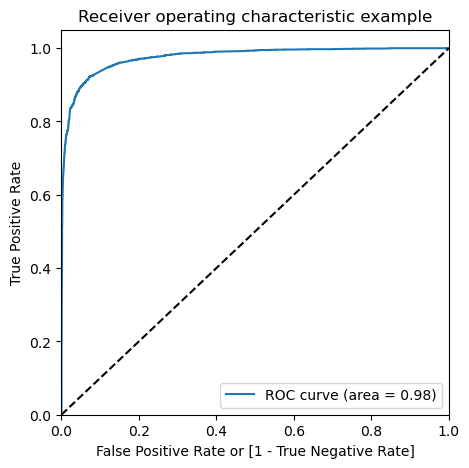

In [118]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

Since we have area under the ROC curve = 0.98, hence our model is a good one.

#### Finding Optimal Cutoff Point

In [119]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.144060,5123,0,1,1,0,0,0,0,0,0,0,0
1,0,0.001228,6322,0,1,0,0,0,0,0,0,0,0,0
2,0,0.000387,3644,0,1,0,0,0,0,0,0,0,0,0
3,0,0.001195,3011,0,1,0,0,0,0,0,0,0,0,0
4,0,0.000635,8140,0,1,0,0,0,0,0,0,0,0,0


In [120]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.378084  1.000000  0.000000
0.1   0.1  0.848129  0.974257  0.771452
0.2   0.2  0.902500  0.949845  0.873718
0.3   0.3  0.924987  0.915224  0.930923
0.4   0.4  0.927840  0.897914  0.946033
0.5   0.5  0.928679  0.880160  0.958176
0.6   0.6  0.925994  0.859743  0.966271
0.7   0.7  0.922806  0.835775  0.975715
0.8   0.8  0.906025  0.779849  0.982731
0.9   0.9  0.890250  0.724368  0.991096


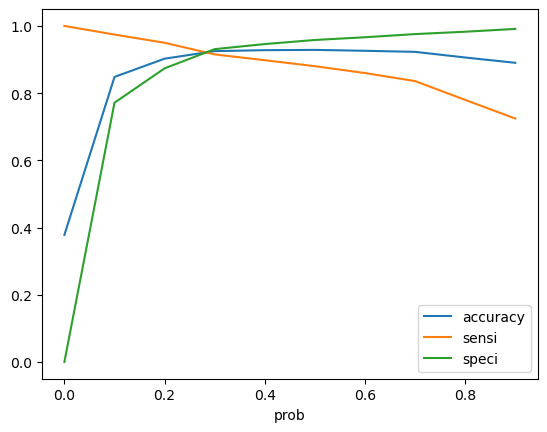

In [121]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the curve above, 0.30 is the optimum point to take it as a cutoff probability.

In [122]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.30 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.144060,5123,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.001228,6322,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.000387,3644,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.001195,3011,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.000635,8140,0,1,0,0,0,0,0,0,0,0,0,0


In [123]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9249874139956369

In [124]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3450,  256],
       [ 191, 2062]], dtype=int64)

In [125]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [126]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9152241455836663

In [127]:
# Let us calculate specificity
TN / float(TN+FP)

0.9309228278467351

In [128]:
# Calculate false postive rate 
print(FP/ float(TN+FP))

0.06907717215326498


In [129]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8895599654874892


In [130]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9475418840977753


With the cut off at 0.3 we have accuracy = 0.924, sensitivity = 0.915 and specificity = 0.930

#### Precision and Recall

In [131]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3551,  155],
       [ 270, 1983]], dtype=int64)

Precision = TP/TP+FP

In [132]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.9275023386342376

Recall = TP/TP+FN

In [133]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8801597869507324

In [134]:
from sklearn.metrics import precision_recall_curve

In [135]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 5954    0
 5955    0
 5956    0
 5957    0
 5958    0
 Name: Converted, Length: 5959, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       0
        ..
 5954    0
 5955    0
 5956    0
 5957    0
 5958    0
 Name: predicted, Length: 5959, dtype: int64)

In [136]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

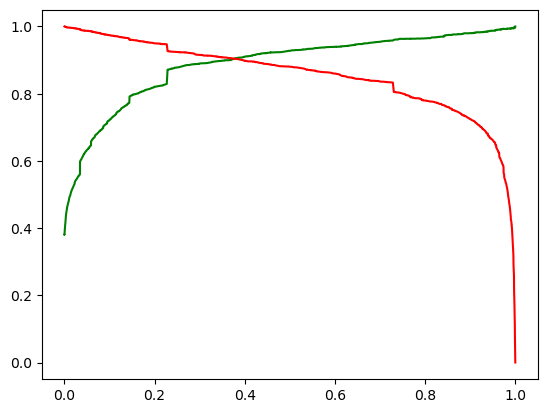

In [137]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

From the curve above, 0.40 is the cut-off point. I decided to choose the cut off point at 0.30 for this model

### Making predictions on the test set

In [138]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [139]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,...,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_switched off,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Modified,Last Notable Activity_SMS Sent,Last Notable Activity_Unsubscribed
7358,0,-0.191492,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8398,0,2.528656,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3472,0,-0.584524,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8673,0,0.671351,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8053,0,1.477524,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [140]:
X_test_sm = sm.add_constant(X_test)

In [141]:
y_test_pred = res.predict(X_test_sm)

In [142]:
y_test_pred[:10]

7358    0.000542
8398    0.480225
3472    0.078490
8673    0.990405
8053    0.998417
6385    0.003287
5396    0.001398
7152    0.144060
7013    0.995672
7903    0.227172
dtype: float64

In [143]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [144]:
y_pred_1.head()

,0
7358,0.000542
8398,0.480225
3472,0.078490
8673,0.990405
8053,0.998417


In [145]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [146]:
# Putting Lead Number to index
y_test_df['Lead Number'] = y_test_df.index

In [147]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [148]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [149]:
y_pred_final.head()

,Converted,Lead Number,0
0,0,7358,0.000542
1,0,8398,0.480225
2,0,3472,0.078490
3,1,8673,0.990405
4,1,8053,0.998417


In [150]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [151]:
y_pred_final.head()

,Converted,Lead Number,Converted_Prob
0,0,7358,0.000542
1,0,8398,0.480225
2,0,3472,0.078490
3,1,8673,0.990405
4,1,8053,0.998417


In [152]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.35 else 0)

In [153]:
y_pred_final.head()

,Converted,Lead Number,Converted_Prob,final_predicted
0,0,7358,0.000542,0
1,0,8398,0.480225,1
2,0,3472,0.078490,0
3,1,8673,0.990405,1
4,1,8053,0.998417,1


In [154]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.9283476898981989

In [155]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1505,   96],
       [  87,  866]], dtype=int64)

In [156]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [157]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9087093389296957

In [158]:
# Let us calculate specificity
TN / float(TN+FP)

0.9400374765771393

With the cut off at 0.30 for the test set, we have the rate of accuracy = 92.8%, sensitivity = 90.8% and specificity of around 94.0%

Calculate the Lead score

In [159]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_Prob.map( lambda x: round(x*100))

y_pred_final.head(100)

,Converted,Lead Number,Converted_Prob,final_predicted,Lead_Score
0,0,7358,0.000542,0,0
1,0,8398,0.480225,1,48
2,0,3472,0.078490,0,8
3,1,8673,0.990405,1,99
4,1,8053,0.998417,1,100
...,...,...,...,...,...
95,1,7672,0.999010,1,100
96,0,6573,0.004413,0,0
97,1,619,0.990219,1,99
98,0,3058,0.014151,0,1



#### Comparing the values obtained for Train set & Test set:
- Train set:
    Accuracy : 92.4 %
    Sensitivity : 91.5 %
    Specificity : 93.0 %
- Test set:
    Accuracy : 92.8 %
    Sensitivity : 90.8 %
    Specificity : 94.0 %
-  The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%. We have succeeded in achieving our objective of estimating the desired lead conversion rate to be around 92%. We should be able to provide the CEO confidence to make decisions based on this model.

I believe that the Lead_Score of more than 90 points are the hot leads.

In [160]:
hot_leads=y_pred_final.loc[y_pred_final["Lead_Score"]>=90]
hot_leads

,Converted,Lead Number,Converted_Prob,final_predicted,Lead_Score
3,1,8673,0.990405,1,99
4,1,8053,0.998417,1,100
8,1,7013,0.995672,1,100
11,1,607,0.999518,1,100
19,1,1663,0.957650,1,96
...,...,...,...,...,...
2535,1,2022,0.931616,1,93
2543,1,7772,0.951782,1,95
2546,1,5376,0.999017,1,100
2551,1,3462,0.995197,1,100


In [161]:
print("The Lead Number of the customers which should be contacted are :")

hot_leads_number = hot_leads['Lead Number'].values.reshape(-1)
hot_leads_number

The Lead Number of the customers which should be contacted are :


array([8673, 8053, 7013,  607, 1663, 4466, 2159,  262, 4233, 7966, 1050,
       7419, 3147, 4137, 7552, 7055, 5448, 5443, 5502, 3123, 6373, 3042,
       3034, 6710, 2940, 9222, 1307, 6792, 3068, 7672,  619, 1502,   98,
        215, 8749, 5947,  572, 4592, 4896, 7456, 2820,  799, 3020, 4830,
       8233,  493, 5794, 8681, 8880, 2857, 4068, 1780,  604, 4820, 7565,
       1079, 3194,  505, 7267, 1350, 7408,  715, 1193, 6011, 8535, 3932,
       2486, 7327, 7885, 4005, 9049, 4297, 5044, 3511, 4216, 3486, 5553,
       6666, 1585, 1379, 6171, 3616, 5096, 7970, 6687, 6370, 8257, 9203,
        230, 8888, 2105,  956, 8320, 2483, 3777, 7288, 5807, 3514, 6125,
       4703, 3601, 1287,  647, 8078, 3373, 7113, 3421,  392, 3172, 2890,
        686, 8086, 8536, 4776, 8588, 1710, 5223,  494, 1570, 1826,  560,
       1146, 6513, 2762, 5747, 1800, 4179, 1110, 7243, 3614,  356, 7208,
       1603, 7503, 1406, 3643, 6839, 5414, 5616, 6368, 1927, 7018, 8351,
       8999, 9219, 7453, 5049, 5818, 8556, 2748, 37

Showing the most valuable variables

In [162]:
res.params.sort_values(ascending=False).head(10)

Tags_Closed by Horizzon                                   9.437122
Tags_Lost to EINS                                         8.799028
Tags_Will revert after reading the email                  7.046204
Lead Source_Welingak Website                              5.883592
Tags_Want to take admission but has financial problems    4.164531
Last Activity_Had a Phone Conversation                    4.024437
Tags_in touch with EINS                                   3.399131
Tags_Busy                                                 3.220585
Tags_In confusion whether part time or DLP                3.033742
Tags_Still Thinking                                       2.666875
dtype: float64

Showing the least related variables

In [163]:
res.params.sort_values(ascending=True).head()

const                                   -3.818169
Last Activity_Email Bounced             -1.876122
Tags_switched off                       -1.718367
Last Activity_Converted to Lead         -1.618353
Last Activity_Olark Chat Conversation   -1.542451
dtype: float64

#### Conclusion
According to the model, the following factors affected potential purchasers the most (in descending order):
Tags_Closed by Horizzon, Tags_Lost to EINS, Tags_Will revert after reading the email, Lead Source_Welingak Website, Last Activity_Had a Phone Conversation 

